## Inciso a)
### K= 3, Variables = “review_scores_accuracy” y “number_of_reviews”

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Convertir el dataset en un dataframe
df= pd.read_csv("listings_filtrado.csv")
df

,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI",...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI",...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI",...,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0
3,5532,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,NaN,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,"Waialua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,NaN,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,t,61,61,0,0
36121,1369824863578661367,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,"Hawaii, United States",...,NaN,NaN,NaN,NaN,NaN,t,548,540,8,0
36122,1369841764486904562,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,"Honolulu, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
36123,1369865927101822261,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,"Kailua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0


In [ ]:
# Sustituir los valores nulos por los no nulos hacia adelante
df_reindexado = df_reindexado.fillna(method="ffill")

/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/187457534.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [4]:
# Seleccionar las dos columnas (variables) para el clustering
X = df_reindexado[['review_scores_accuracy', 'number_of_reviews']].values
X

array([[  4.88,  40.  ],
       [  4.69, 231.  ],
       [  4.69,   0.  ],
       ...,
       [  5.  ,   0.  ],
       [  5.  ,   0.  ],
       [  5.  ,   0.  ]], shape=(36125, 2))

In [5]:
# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [6]:
# Entrenar al modelo
etiquetas = kmeans.fit_predict(X)
etiquetas

array([0, 2, 0, ..., 0, 0, 0], shape=(36125,), dtype=int32)

In [7]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[  4.77733451,  12.71884771],
       [  4.88534066, 361.29450549],
       [  4.86905686, 125.56374927]])

In [ ]:
# Eliminar la columna 'cluster_2D' si ya existe
if 'cluster_2D' in df_reindexado.columns:
    df_reindexado.drop('cluster_2D', axis=1, inplace=True)

# Agregar la columna cluster_2D en el dataframe
df_reindexado.insert(loc=1, column='cluster_2D', value=etiquetas)
df_reindexado

,id,cluster_2D,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,0,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,2,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,0,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,...,4.42,4.85,4.88,4.74,4.78,f,3,0,3,0
3,5532,0,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,...,4.42,4.85,4.88,4.74,4.78,f,1,1,0,0
4,7888,2,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,0,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,ONE BLOCK FROM THE BEACH AND ZOO. <br /><br />...,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,...,5.00,5.00,5.00,5.00,5.00,t,61,61,0,0
36121,1369824863578661367,0,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,...,5.00,5.00,5.00,5.00,5.00,t,548,540,8,0
36122,1369841764486904562,0,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
36123,1369865927101822261,0,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0


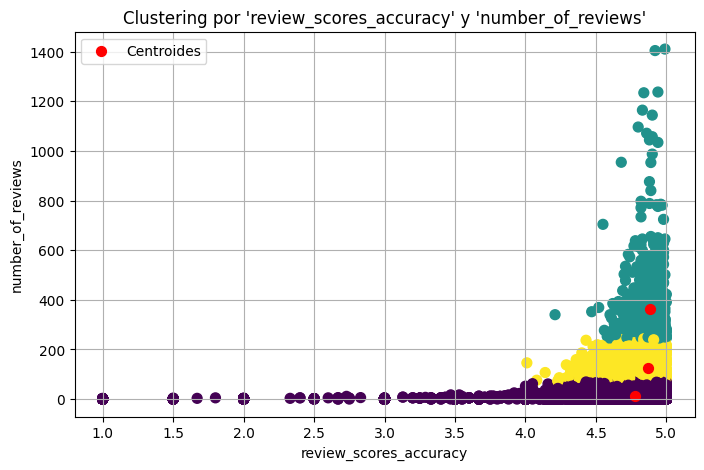

In [9]:
# Para visualizar en 2D, Se utiliza una variable como eje X y la otra variable como eje Y
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por 'review_scores_accuracy' y 'number_of_reviews'")
plt.xlabel("review_scores_accuracy")
plt.ylabel("number_of_reviews")
plt.legend()
plt.grid(True)
plt.show()

## Inciso b)
### K= 2, Variables = 'calculated_host_listings_count', 'number_of_reviews', 'minimum_nights' y 'price'

In [10]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convertir el dataset en un dataframe
df_reindexado= pd.read_csv("listings_filtrado.csv")
df_reindexado

# Sustituir los valores nulos por los no nulos hacia adelante
df_reindexado = df_reindexado.fillna(method="ffill")

# Limpiar la columna 'price' para quitar el símbolo de dólar y convertir a float
df_reindexado['price'] = df_reindexado['price'].replace('[\$,]', '', regex=True).astype(float)

# Ahora selecciona las columnas para clustering
X = df_reindexado[['calculated_host_listings_count', 'number_of_reviews', 'minimum_nights', 'price']].values

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2327659772.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2327659772.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2327659772.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [12]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#Aplicamos K-means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [14]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([1, 1, 1, ..., 1, 1, 1], shape=(36125,), dtype=int32)

In [15]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[ 1.54755072, -0.38880379,  0.39659004,  0.31053163],
       [-0.43413266,  0.10907069, -0.11125496, -0.08711309]])

In [ ]:
# Eliminar la columna 'cluster_2D' si ya existe
if 'cluster_4D' in df_reindexado.columns:
    df_reindexado.drop('cluster_4D', axis=1, inplace=True)

# Agregamos la columna cluster_4D con las etiquetas obtenidas en una posición específica
df_reindexado.insert(loc=1, column='cluster_4D', value= etiquetas)
df_reindexado


,id,cluster_4D,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,1,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,1,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,1,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,...,4.42,4.85,4.88,4.74,4.78,f,3,0,3,0
3,5532,1,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,...,4.42,4.85,4.88,4.74,4.78,f,1,1,0,0
4,7888,1,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,1,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,ONE BLOCK FROM THE BEACH AND ZOO. <br /><br />...,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,...,5.00,5.00,5.00,5.00,5.00,t,61,61,0,0
36121,1369824863578661367,0,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,...,5.00,5.00,5.00,5.00,5.00,t,548,540,8,0
36122,1369841764486904562,1,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
36123,1369865927101822261,1,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0


In [17]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

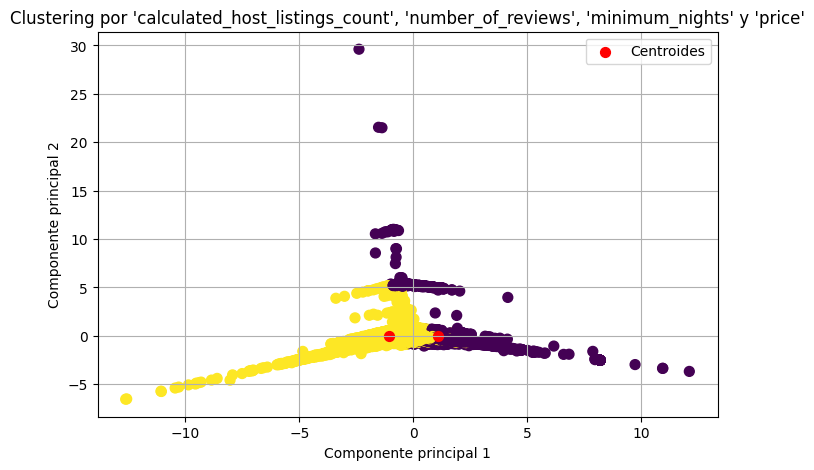

In [18]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')
plt.title("Clustering por 'calculated_host_listings_count', 'number_of_reviews', 'minimum_nights' y 'price'")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

## Inciso c)
### K= 5, Variables = 'price', 'review_scores_value' y 'review_scores_location'

In [19]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convertir el dataset en un dataframe
df_reindexado= pd.read_csv("listings_filtrado.csv")
df_reindexado

# Sustituir los valores nulos por los no nulos hacia adelante
df_reindexado = df_reindexado.fillna(method="ffill")

# Limpiar la columna 'price' para quitar el símbolo de dólar y convertir a float
df_reindexado['price'] = df_reindexado['price'].replace('[\$,]', '', regex=True).astype(float)

# Ahora selecciona las columnas para clustering
X = df_reindexado[['price', 'review_scores_value', 'review_scores_location']].values
X

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/1234685164.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/1234685164.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/1234685164.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


array([[ 128.  ,    4.85,    5.  ],
       [  97.  ,    4.78,    4.74],
       [ 117.  ,    4.78,    4.74],
       ...,
       [  80.  ,    5.  ,    5.  ],
       [ 102.  ,    5.  ,    5.  ],
       [1746.  ,    5.  ,    5.  ]], shape=(36125, 3))

In [21]:
# Escalamos o Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Aplicamos K-means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [23]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([0, 0, 0, ..., 0, 0, 0], shape=(36125,), dtype=int32)

In [24]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[-0.03331802,  0.4308362 ,  0.27718173],
       [ 0.01577288, -3.5854152 , -5.08152476],
       [14.03291822, -0.01862656, -0.08567033],
       [ 0.02208141, -3.61516621, -0.24943645],
       [-0.09216565, -0.56770453, -0.29906874]])

In [ ]:
# Eliminar la columna 'cluster_2D' si ya existe
if 'cluster_3D' in df_reindexado.columns:
    df_reindexado.drop('cluster_3D', axis=1, inplace=True)

# Agregamos la columna cluster_3D con las etiquetas obtenidas en una posición específica
df_reindexado.insert(loc=1, column='cluster_3D', value= etiquetas)
df_reindexado

,id,cluster_3D,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,0,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,0,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,0,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,...,4.42,4.85,4.88,4.74,4.78,f,3,0,3,0
3,5532,0,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,...,4.42,4.85,4.88,4.74,4.78,f,1,1,0,0
4,7888,4,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,0,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,ONE BLOCK FROM THE BEACH AND ZOO. <br /><br />...,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,...,5.00,5.00,5.00,5.00,5.00,t,61,61,0,0
36121,1369824863578661367,0,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,...,5.00,5.00,5.00,5.00,5.00,t,548,540,8,0
36122,1369841764486904562,0,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
36123,1369865927101822261,0,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0


In [26]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

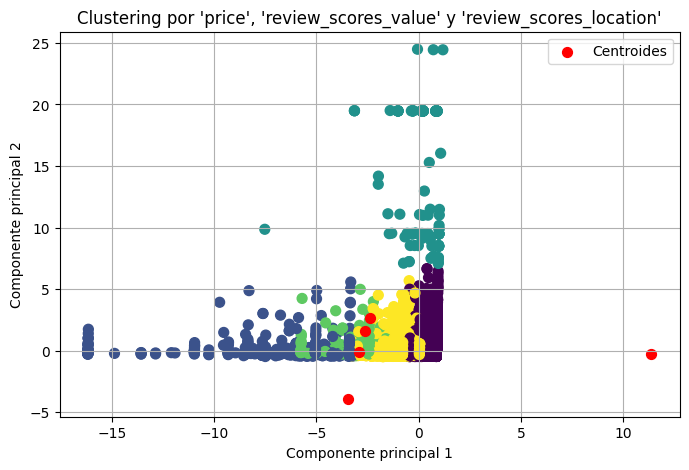

In [27]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

# “price”, “review_scores_value” y “review_scores_location”
plt.title("Clustering por 'price', 'review_scores_value' y 'review_scores_location'")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

## Inciso d)
### K= 4, Variables = 'calculated_host_listings_count', 'minimum_nights', 'host_acceptance_rate' y 'availability_30'

In [28]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convertir el dataset en un dataframe
df_reindexado= pd.read_csv("listings_filtrado.csv")
df_reindexado

# Sustituir los valores nulos por los no nulos hacia adelante
df_reindexado = df_reindexado.fillna(method="ffill")

# Limpiar la columna 'price' para quitar el símbolo de dólar y convertir a float
df_reindexado['host_acceptance_rate'] = df_reindexado['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)


# Ahora selecciona las columnas para clustering
X = df_reindexado[['calculated_host_listings_count', 'minimum_nights', 'host_acceptance_rate', 'availability_30']].values
X

<>:9: SyntaxWarning: invalid escape sequence '\%'
<>:9: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2056341348.py:9: SyntaxWarning: invalid escape sequence '\%'
  df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2056341348.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2056341348.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


array([[ 3.,  3., 96.,  8.],
       [ 2.,  5., 96.,  2.],
       [ 3.,  2.,  0., 30.],
       ...,
       [ 1., 29., 99., 30.],
       [ 1.,  1., 99., 19.],
       [61.,  1., 96., 12.]], shape=(36125, 4))

In [30]:
# Escalamos o Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
#Aplicamos K-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [32]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([3, 3, 2, ..., 1, 1, 3], shape=(36125,), dtype=int32)

In [33]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[ 1.9180714 , -0.18286307,  0.26702799, -0.21925723],
       [-0.27311982,  0.13629591,  0.27847323,  1.32687596],
       [-0.18391839,  0.37262856, -2.53429617,  0.53320398],
       [-0.45752706, -0.07487712,  0.32283857, -0.58617869]])

In [ ]:
# Eliminar la columna 'cluster_2D' si ya existe
if 'cluster_4D' in df_reindexado.columns:
    df_reindexado.drop('cluster_4D', axis=1, inplace=True)

# Agregamos la columna cluster_4D con las etiquetas obtenidas en una posición específica
df_reindexado.insert(loc=1, column='cluster_4D', value= etiquetas)
df_reindexado

,id,cluster_4D,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,3,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,3,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,2,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,...,4.42,4.85,4.88,4.74,4.78,f,3,0,3,0
3,5532,2,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,...,4.42,4.85,4.88,4.74,4.78,f,1,1,0,0
4,7888,2,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,3,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,ONE BLOCK FROM THE BEACH AND ZOO. <br /><br />...,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,...,5.00,5.00,5.00,5.00,5.00,t,61,61,0,0
36121,1369824863578661367,0,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,...,5.00,5.00,5.00,5.00,5.00,t,548,540,8,0
36122,1369841764486904562,1,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
36123,1369865927101822261,1,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0


In [35]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

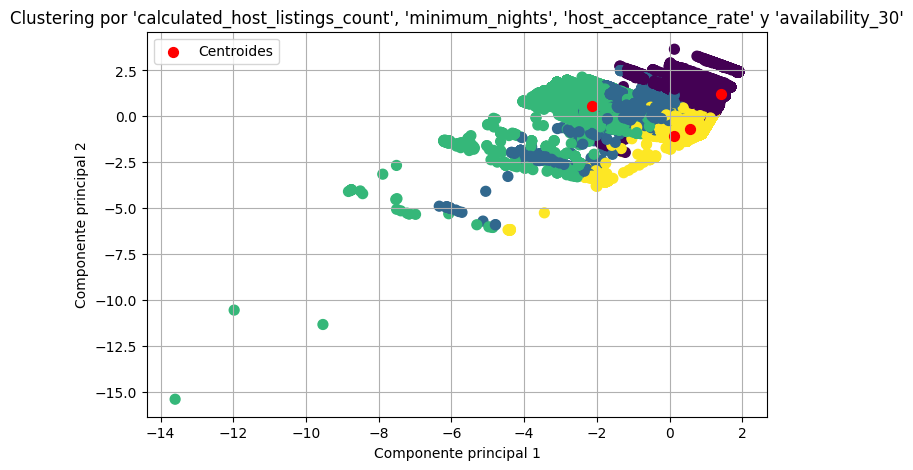

In [36]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por 'calculated_host_listings_count', 'minimum_nights', 'host_acceptance_rate' y 'availability_30'")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

## Inciso e)
### K= 10, Variables = 'number_of_reviews', 'calculated_host_listings_count', 'review_scores_cleanliness', 'review_scores_rating' y 'host_acceptance_rate'

In [37]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convertir el dataset en un dataframe
df_reindexado= pd.read_csv("listings_filtrado.csv")
df_reindexado

# Sustituir los valores nulos por los no nulos hacia adelante
df_reindexado = df_reindexado.fillna(method="ffill")

# Limpiar la columna 'price' para quitar el símbolo de dólar y convertir a float
df_reindexado['host_acceptance_rate'] = df_reindexado['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
df_reindexado['review_scores_rating'] = df_reindexado['review_scores_rating'].replace('[\%,]', '', regex=True).astype(float)


# Ahora selecciona las columnas para clustering
X = df_reindexado[['number_of_reviews', 'calculated_host_listings_count', 'review_scores_cleanliness', 'review_scores_rating', 'host_acceptance_rate']].values
X

<>:9: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:9: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2581987597.py:9: SyntaxWarning: invalid escape sequence '\%'
  df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2581987597.py:10: SyntaxWarning: invalid escape sequence '\%'
  df['review_scores_rating'] = df['review_scores_rating'].replace('[\%,]', '', regex=True).astype(float)
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2581987597.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_88926/2581987597.py:6: Fu

array([[ 40.  ,   3.  ,   4.55,   4.78,  96.  ],
       [231.  ,   2.  ,   4.42,   4.67,  96.  ],
       [  0.  ,   3.  ,   4.42,   4.67,   0.  ],
       ...,
       [  0.  ,   1.  ,   5.  ,   5.  ,  99.  ],
       [  0.  ,   1.  ,   5.  ,   5.  ,  99.  ],
       [  0.  ,  61.  ,   5.  ,   5.  ,  96.  ]], shape=(36125, 5))

In [39]:
# Escalamos o Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
#Aplicamos K-means con 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [41]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X)
etiquetas

array([1, 8, 7, ..., 7, 7, 6], shape=(36125,), dtype=int32)

In [42]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[ 11.43039349, 180.83012212,   4.71637449,   4.73282225,
         85.9009498 ],
       [ 71.02214384,   8.819126  ,   4.81209289,   4.84361748,
         96.33588085],
       [  4.91605839, 548.        ,   4.79932482,   4.79187956,
         99.        ],
       [627.91472868,   3.05426357,   4.83527132,   4.83868217,
         99.08527132],
       [314.00367647,   4.8995098 ,   4.82845588,   4.84534314,
         97.09558824],
       [ 10.5701846 , 291.73075583,   4.72057471,   4.70284918,
         89.72135145],
       [ 11.09795173,  82.43703103,   4.7575076 ,   4.76300548,
         76.76982357],
       [  8.59868056,  12.91048611,   4.77289375,   4.79163403,
         86.25465278],
       [163.57817726,   7.42934783,   4.81246656,   4.83895067,
         97.09531773],
       [ 10.8176    , 416.8208    ,   4.755432  ,   4.764232  ,
         98.644     ]])

In [ ]:
# Eliminar la columna 'cluster_2D' si ya existe
if 'cluster_5D' in df_reindexado.columns:
    df_reindexado.drop('cluster_5D', axis=1, inplace=True)


# Agregamos la columna cluster_5D con las etiquetas obtenidas en una posición específica
df_reindexado.insert(loc=1, column='cluster_5D', value= etiquetas)
df_reindexado

,id,cluster_5D,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,1,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,8,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,7,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,...,4.42,4.85,4.88,4.74,4.78,f,3,0,3,0
3,5532,7,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,...,4.42,4.85,4.88,4.74,4.78,f,1,1,0,0
4,7888,8,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,6,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,ONE BLOCK FROM THE BEACH AND ZOO. <br /><br />...,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,...,5.00,5.00,5.00,5.00,5.00,t,61,61,0,0
36121,1369824863578661367,2,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,...,5.00,5.00,5.00,5.00,5.00,t,548,540,8,0
36122,1369841764486904562,7,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
36123,1369865927101822261,7,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0


In [44]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

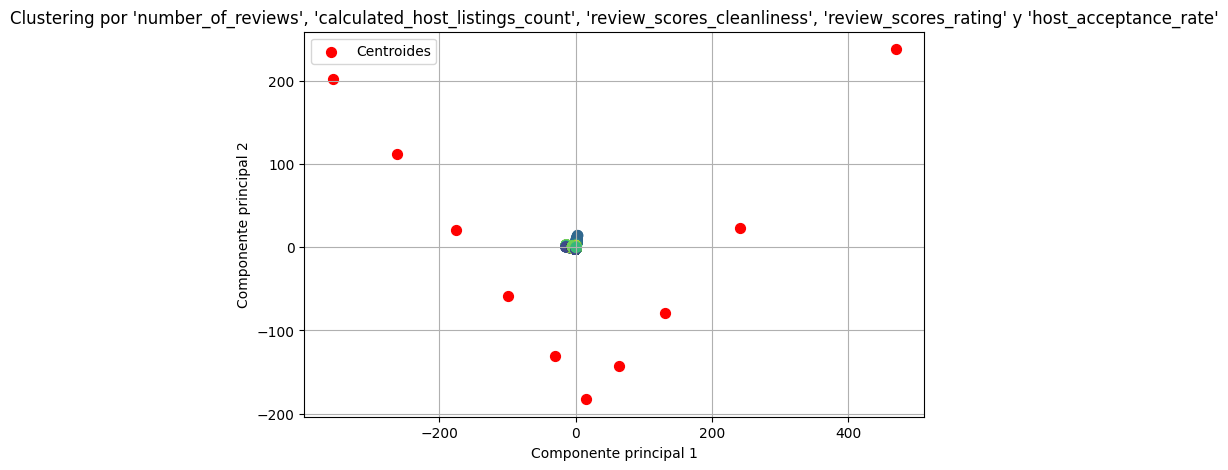

In [45]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por 'number_of_reviews', 'calculated_host_listings_count', 'review_scores_cleanliness', 'review_scores_rating' y 'host_acceptance_rate'")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()